In [1]:
import os
os.chdir("I:\\New\\project dataset")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))

def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

def get_variable_type(element) :
    """
     Check is columns are of Continuous or Categorical variable.
     Assumption is that if 
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed 
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # data types of columns
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # total elements in columns
                    'Null_Count': dataframe.isnull().sum().astype(int), # total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # percentage of null values
                    'Unique_Values_Count': dataframe.nunique().astype(int) # number of unique values
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def plot_data_pie_chat(dataframe,col) : 
    header("Stats for "+col+" Datatype Percentage Distribution")
    dataframe_group = dataframe.groupby(col).frequency.count().reset_index()
    dataframe_group.sort_values([col], axis=0,ascending=False, inplace=True)
    trace = go.Pie(labels=dataframe_group[col].tolist(), values=dataframe_group["frequency"].tolist())
    layout = go.Layout(title="Datatype Percentage Distribution")
    fig = go.Figure(data=[trace], layout=layout)    
    py.offline.iplot(fig)

def pairplot(x_axis,y_axis) :
    sns.pairplot(car_df,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

def bar_count_plot(dataframe,col_name) :
    plt.figure(figsize=(16,8))
    plt.title(col_name + 'Histogram')
    sns.countplot(dataframe[col_name], palette=("plasma"))
    xticks(rotation = 90)
    plt.show()

def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

def accuracy_result(y_test, y_pred_test):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    # USE THE IMPORTED CONFUSION MATRIX
    print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    false_positive_rate = round(FP / float(TN + FP),3)
    print('FPR: ', false_positive_rate)
    print('TPR/ RECALL/ SENSTIVITY: ', round(metrics.recall_score(y_test, y_pred_test), 3))
    print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_test), 3))
    specificity = round(TN / (TN + FP),3)
    print('SPECIFICITY: ',specificity)
    print('ACCURACY: ', np.round(metrics.accuracy_score(y_test, y_pred_test),3))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred_test),3))
    print('Cohens kappa: ',np.round(cohen_kappa_score(y_test, y_pred_test),3))
    print('F1 score: ', np.round(f1_score(y_test, y_pred_test),3))
    print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_test))
    return 

In [4]:
data=pd.read_csv('train.csv')
df1= data.copy()

In [5]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
temp = data[:200000]
_X = temp.drop(['id','target'],axis =1)
_y=temp.target
metadata_matrix_dataframe = get_meta_data(data)
metadata_matrix_dataframe["dt_name"] =[ i.split("_")[-1] for i in metadata_matrix_dataframe.index.values]
metadata_matrix_dataframe['dt_name'] = metadata_matrix_dataframe['dt_name'].apply(lambda x : "interval" if str(x).isnumeric() else x)

In [7]:
Dtype = metadata_matrix_dataframe.groupby(['dt_name'])

interval_feature =Dtype.get_group("interval").index.tolist()
bin_feature = Dtype.get_group("bin").index.tolist()
cat_feature = Dtype.get_group("cat").index.tolist()

Percentge distribution of class '1' & class '0':

 0    96.355248
1     3.644752
Name: target, dtype: float64


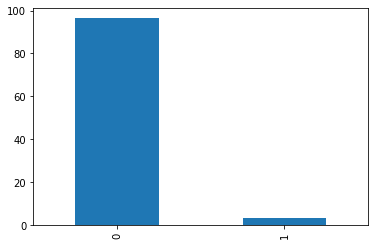

In [8]:
perc = (data['target'].value_counts()/(data.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [12]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [13]:
data.shape

(595212, 59)

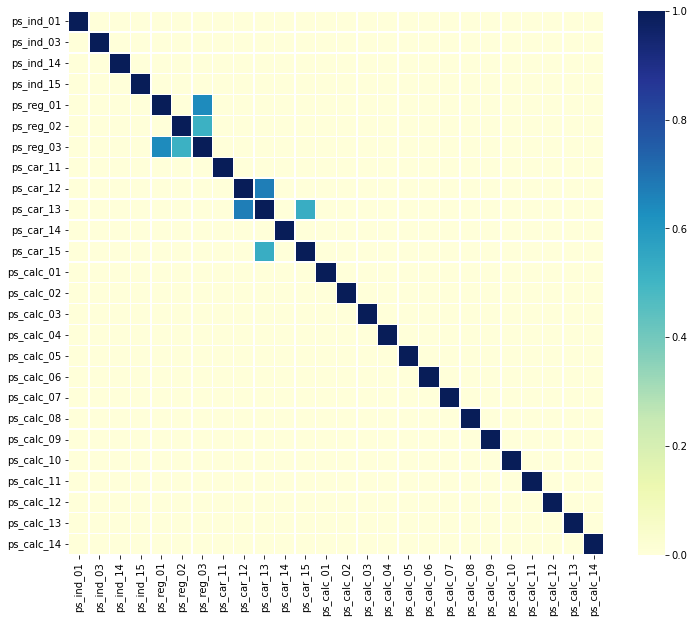

In [14]:
temp = data[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

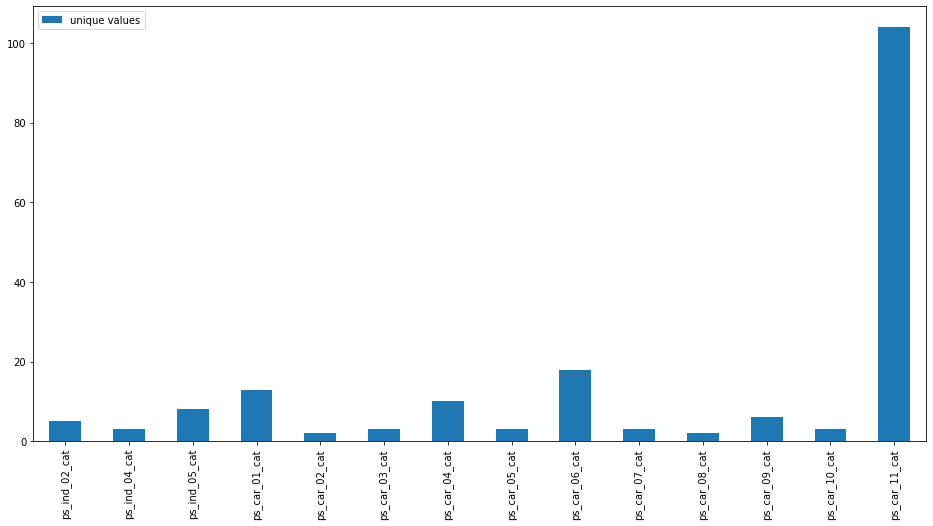

In [15]:
d ={}
for i in data[cat_feature].columns:
    d[i] = data[cat_feature][i].nunique()

pd.DataFrame(d,index=['unique values']).T.plot.bar(figsize=(16,8));

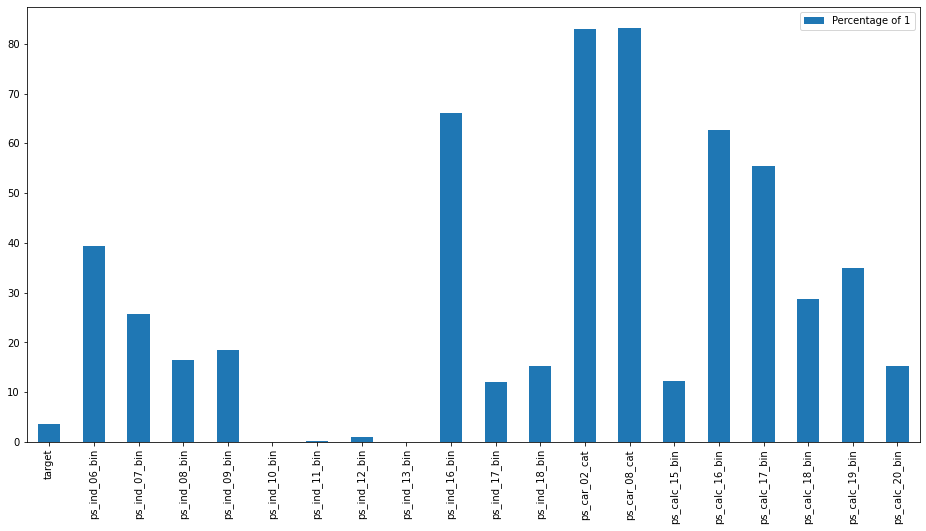

In [16]:
col = metadata_matrix_dataframe[metadata_matrix_dataframe['Unique_Values_Count'] == 2].index
df_1 = pd.DataFrame((data[col].sum()/data[col].shape[0])*100, columns=['Percentage of 1'])
df_1.plot.bar(figsize=(16,8));
#log("Analysis : Looking at above graph % of 1's is near near for *ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin.");

In [17]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [18]:
s1=data.dtypes
s1.groupby(s1).count()

int64      49
float64    10
dtype: int64

In [19]:
data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [20]:
data.isnull().sum().sort_values(ascending = False)

id                0
ps_calc_06        0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_07        0
ps_car_08_cat     0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0
ps_calc_18_bin    0
ps_calc_19_bin    0
ps_car_09_cat     0
ps_car_07_cat     0
target            0
ps_ind_13_bin     0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_14         0
ps_car_06_cat     0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0


In [21]:
data['target'].unique()

array([0, 1], dtype=int64)

In [22]:
corr_matrix = data.corr(method='pearson')
corr_matrix['target'].sort_values(kind="quicksort")

ps_car_07_cat    -0.036395
ps_ind_06_bin    -0.034017
ps_car_02_cat    -0.031545
ps_ind_16_bin    -0.027778
ps_ind_15        -0.021506
ps_car_08_cat    -0.020342
ps_ind_09_bin    -0.008237
ps_car_14        -0.004474
ps_calc_19_bin   -0.001744
ps_car_11        -0.001213
ps_calc_12       -0.001133
ps_calc_20_bin   -0.001072
ps_calc_08       -0.001006
ps_calc_15_bin   -0.000490
ps_calc_13       -0.000446
id               -0.000188
ps_calc_17_bin   -0.000170
ps_calc_07       -0.000103
ps_calc_04        0.000033
ps_calc_06        0.000082
ps_calc_11        0.000371
ps_calc_18_bin    0.000552
ps_calc_16_bin    0.000624
ps_calc_09        0.000719
ps_calc_05        0.000771
ps_car_10_cat     0.001038
ps_calc_10        0.001061
ps_calc_02        0.001360
ps_calc_14        0.001362
ps_calc_01        0.001782
ps_ind_10_bin     0.001815
ps_calc_03        0.001907
ps_ind_11_bin     0.002028
ps_ind_13_bin     0.002460
ps_ind_02_cat     0.004534
ps_ind_18_bin     0.004555
ps_car_09_cat     0.005322
p

In [23]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,-0.002208,-0.001261,-0.001210,-0.000177,-0.001718,-0.001129,-0.001935,-0.000500,0.001344,0.000816,-0.000999,-0.003829,-0.000976,-0.001052,-0.000382,0.000354,0.002310,-0.000850,-0.001010,-0.002956,0.000748,0.000494,-0.000928,0.002047,0.002641,0.001007,0.001944,-0.000737,0.000709,-0.000331,0.000719,-0.000451,0.003638,-0.000592,0.000957,0.000788,0.000836,0.000518,0.000981,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031545,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,0.000033,0.000771,0.000082,-0.000103,-0.001006,0.000719,0.001061,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116991,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-0.000943,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-0.001345,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045213,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-0.002111,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-0.000025,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044902,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,0.000703,-0.001245,0.002361,0.001533,0.001267,-0.001544,0.000230,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003143,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,0.000826,0.001028,0.002626,-0.000151

<Figure size 1296x864 with 0 Axes>

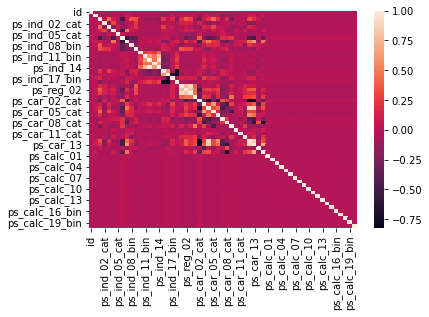

<Figure size 1296x864 with 0 Axes>

In [24]:
sns.heatmap(corr_matrix.corr(),annot=False)
plt.figure(figsize=(18,12))

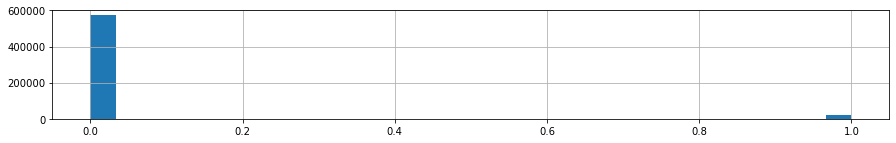

In [25]:
data["target"].hist(bins=30, figsize=(15,2))

In [26]:
data.groupby('target').size()

target
0    573518
1     21694
dtype: int64

Target=1 shape: (21694, 59) 3.64 % 
Target=0 shape: (573518, 59) 96.36 %

 # This Data shows that it's imbalanced


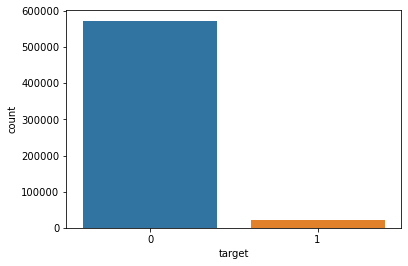

In [27]:
Per1= np.round((data[data['target']==1].shape[0]*100)/ data.shape[0],2)
Per0= np.round((data[data['target']==0].shape[0]*100)/ data.shape[0],2)

print('Target=1 shape:',data[data['target']==1].shape, Per1,'%','\nTarget=0 shape:',data[data['target']==0].shape,Per0,'%')
print("\n # This Data shows that it's imbalanced")
sns.countplot(x= data['target'])
plt.show()

In [28]:
from sklearn.utils import resample
# using resampling technique, splittinf data into classes
df_mino= data[data['target']==1]
df_majo= data[data['target']==0]
df_mino_upsampled = resample(df_mino,replace=True,n_samples=int(len(df_majo)*0.12), random_state = 42)

print("Size of data, after achieving a balance of 12%: ", df_mino_upsampled.shape[0] + df_majo.shape[0])

Size of data, after achieving a balance of 12%:  642340


Class compostion after resampling:
0    573518
1    573518
Name: target, dtype: int64


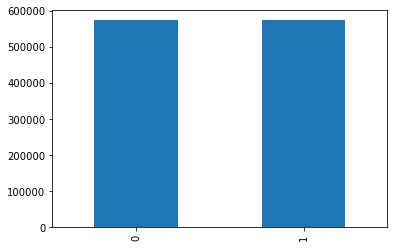

In [29]:
df_mino_upsampled = resample(df_mino,replace=True,n_samples=len(df_majo), random_state = 42)
data = pd.concat([df_majo,df_mino_upsampled])
print("Class compostion after resampling:")
print(data['target'].value_counts())
data['target'].value_counts().plot.bar();

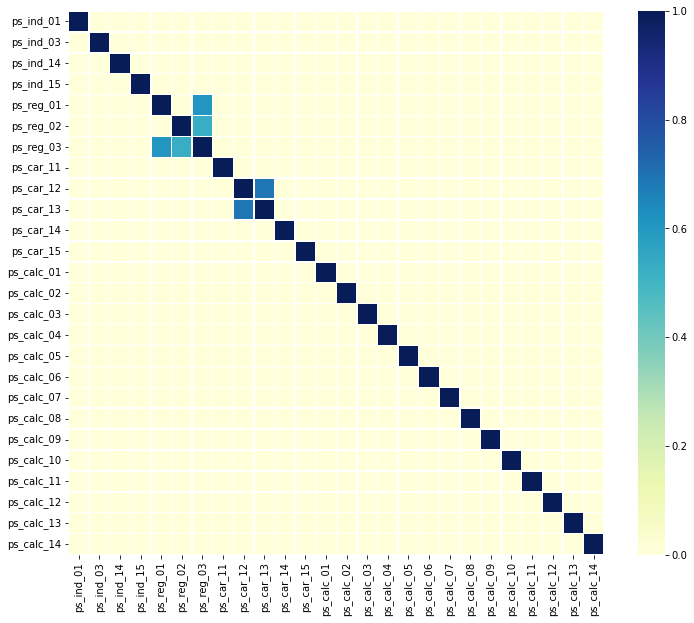

In [30]:
temp = data[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

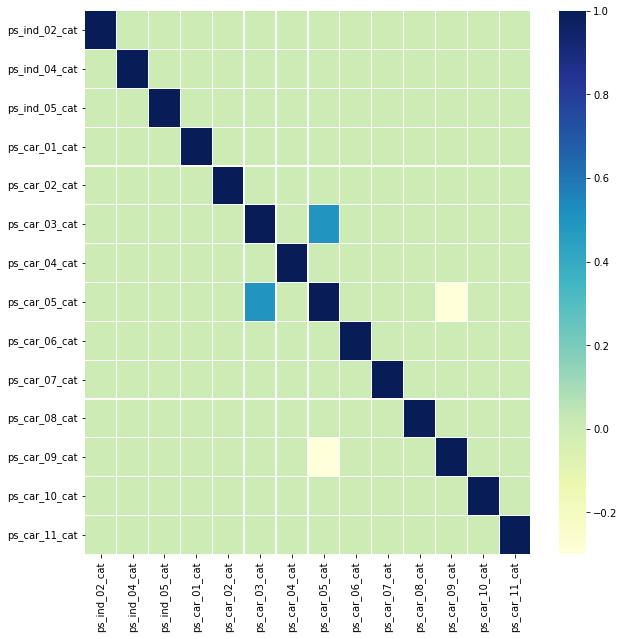

In [31]:
# cutoff = 0.3
temp = data[cat_feature].corr()
temp = temp[(temp>=0.3) | (temp<=-0.3)].fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp,linewidths=.3, cmap="YlGnBu",ax=ax)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(_X,_y)

feature_imp = pd.Series(clf.feature_importances_,index=_X.columns).sort_values(ascending=False)
imp = pd.DataFrame(feature_imp).reset_index()
imp.columns = ["Features", 'Imp']

imp['Imp'] = (imp['Imp']/max(imp['Imp']))*100
col = imp[imp["Imp"]>25]['Features'].tolist()

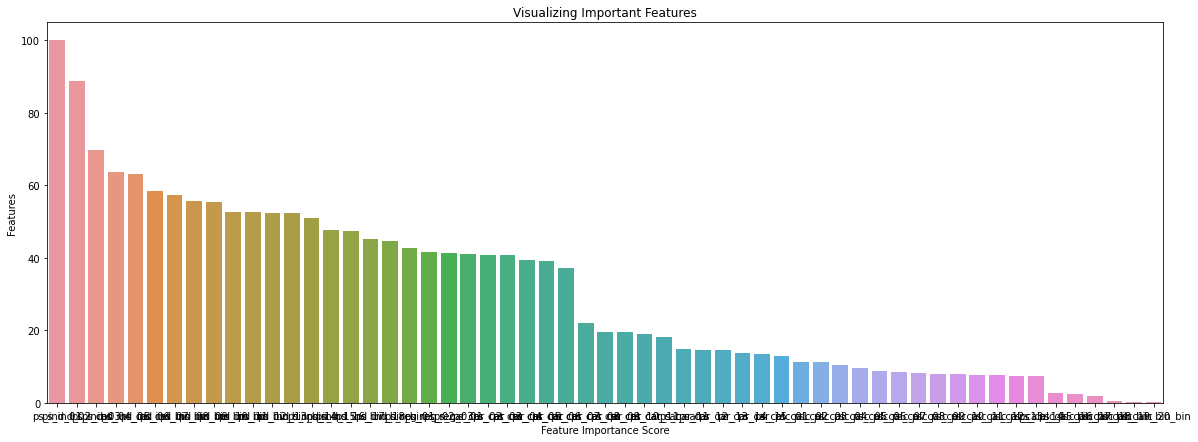

In [33]:
# Creating a bar plot
plt.figure(figsize = (20,7))
sns.barplot(x=_X.columns, y=imp.Imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [34]:
print("Top 10 ordered important features")
print(imp[:10].Features);

Top 10 ordered important features
0        ps_car_13
1        ps_reg_03
2        ps_car_14
3       ps_calc_14
4       ps_calc_10
5       ps_calc_11
6    ps_car_11_cat
7        ps_ind_03
8        ps_ind_15
9       ps_calc_02
Name: Features, dtype: object


In [35]:
x= data.drop(['target','id'], axis=1)
y= data['target']

In [36]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x, y, test_size = 0.3,random_state = 1)

In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score,cohen_kappa_score
from sklearn.utils import resample
from pprint import pprint

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display
import statsmodels.api as sm # import API
from matplotlib.pyplot import xticks

In [41]:
from sklearn.linear_model import LogisticRegression
x_= df1.drop(['target','id'], axis=1)
y_= df1['target']

from sklearn.model_selection import train_test_split as tts
X_Train,X_Test,y_Train,y_Test = tts(x_, y_, test_size = 0.3,random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_Train, y_Train)

# y_pred_train = log_reg.predict(X_Train)
y_pred_logreg1 = log_reg.predict(X_Test)

accuracy_result(y_Test, y_pred_logreg1)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0


C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0
F1 score:  0.0


C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [43]:
## 1. Fitting a Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## 2. Predicting on Train and test data

y_pred_train = log_reg.predict(X_train)
y_pred_logreg2 = log_reg.predict(X_test)

## 3. Using function for evaluating the model output

accuracy_result(y_test, y_pred_logreg2)


 CONFUSION MATRIX:
  [[107904  64389]
 [ 76992  94826]] 

FPR:  0.374
TPR/ RECALL/ SENSTIVITY:  0.552
PRECISION: 0.596
SPECIFICITY:  0.626
ACCURACY:  0.589
ROC AUC:  0.589
Cohens kappa:  0.178
F1 score:  0.573

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    172293
           1       0.60      0.55      0.57    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.59    344111
weighted avg       0.59      0.59      0.59    344111



In [44]:
#support vector classifier
x_tr=X_train[:10000,:]
y_tr=y_train[:10000]

## 1. svm Classifier with linear kernel

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
# FIT SVC ON TRAINING DATA
clf.fit(x_tr, y_tr)

## 2. Predicting on Train and test data

# y_pred_train = clf.predict(X_train)
y_pred_svc = clf.predict(X_test)

#  model output
accuracy_result(y_test, y_pred_svc)


 CONFUSION MATRIX:
  [[111423  60870]
 [ 81580  90238]] 

FPR:  0.353
TPR/ RECALL/ SENSTIVITY:  0.525
PRECISION: 0.597
SPECIFICITY:  0.647
ACCURACY:  0.586
ROC AUC:  0.586
Cohens kappa:  0.172
F1 score:  0.559

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.61    172293
           1       0.60      0.53      0.56    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.58    344111
weighted avg       0.59      0.59      0.58    344111



In [45]:
#xgboost classifier
## 1. Initializing XGboost Classifier

xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train, y_train)

## 2. Predicting on Train and test data

# y_pred_train = xg_cls.predict(X_train)
y_pred_xgb = xg_cls.predict(X_test)

# function for evaluating the model output
accuracy_result(y_test, y_pred_xgb)


 CONFUSION MATRIX:
  [[171743    550]
 [     0 171818]] 

FPR:  0.003
TPR/ RECALL/ SENSTIVITY:  1.0
PRECISION: 0.997
SPECIFICITY:  0.997
ACCURACY:  0.998
ROC AUC:  0.998
Cohens kappa:  0.997
F1 score:  0.998

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172293
           1       1.00      1.00      1.00    171818

    accuracy                           1.00    344111
   macro avg       1.00      1.00      1.00    344111
weighted avg       1.00      1.00      1.00    344111



In [46]:
#adaboost classifier
# Create adaboost classifer object
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_ada = model1.predict(X_test)

accuracy_result(y_test, y_pred_ada)


 CONFUSION MATRIX:
  [[106594  65699]
 [ 72948  98870]] 

FPR:  0.381
TPR/ RECALL/ SENSTIVITY:  0.575
PRECISION: 0.601
SPECIFICITY:  0.619
ACCURACY:  0.597
ROC AUC:  0.597
Cohens kappa:  0.194
F1 score:  0.588

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.61    172293
           1       0.60      0.58      0.59    171818

    accuracy                           0.60    344111
   macro avg       0.60      0.60      0.60    344111
weighted avg       0.60      0.60      0.60    344111



In [47]:
#MLP Classifier
# Training the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train, y_train.values.ravel())

# Prediction on x_test
y_predic = mlp.predict(X_test)
accuracy_result(y_test,y_predic)


 CONFUSION MATRIX:
  [[ 98086  74207]
 [ 60992 110826]] 

FPR:  0.431
TPR/ RECALL/ SENSTIVITY:  0.645
PRECISION: 0.599
SPECIFICITY:  0.569
ACCURACY:  0.607
ROC AUC:  0.607
Cohens kappa:  0.214
F1 score:  0.621

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.62      0.57      0.59    172293
           1       0.60      0.65      0.62    171818

    accuracy                           0.61    344111
   macro avg       0.61      0.61      0.61    344111
weighted avg       0.61      0.61      0.61    344111



In [48]:
#final result comparison
data = {'Log_Reg(Before Resamp)':[np.round(f1_score(y_Test, y_pred_logreg1),3), np.round(metrics.accuracy_score(y_Test, y_pred_logreg1),3)],
        'Log_Reg(After Resamp)':[np.round(f1_score(y_test, y_pred_logreg2),3), np.round(metrics.accuracy_score(y_test, y_pred_logreg2),3)],
        'SVC':[np.round(f1_score(y_test, y_pred_svc),3), np.round(metrics.accuracy_score(y_test, y_pred_svc),3)],
        'XGBoost':[np.round(f1_score(y_test, y_pred_xgb),3), np.round(metrics.accuracy_score(y_test, y_pred_xgb),3)],
        'AdaBoost':[np.round(f1_score(y_test, y_pred_ada),3), np.round(metrics.accuracy_score(y_test, y_pred_ada),3)],
        'MLP Classifier':[np.round(f1_score(y_test, y_predic),3), np.round(metrics.accuracy_score(y_test, y_predic),3)]}

df_result=pd.DataFrame(data, index = ['F1_score', 'Accuracy']).T
df_result

,F1_score,Accuracy
Log_Reg(Before Resamp),0.000,0.964
Log_Reg(After Resamp),0.573,0.589
SVC,0.559,0.586
XGBoost,0.998,0.998
AdaBoost,0.588,0.597
MLP Classifier,0.621,0.607


In [ ]:
#After comparing the F1- score and Accuracy of all used Machine Learning models, we found that XGBoost model is best performing and giving best result with respect to all other model